In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("final_1040009100.csv",encoding = "cp949", index_col = 0)
y = df['value']
X = df.drop(['value','time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 96)

In [6]:
# 폰트깨짐 방지
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [ ]:
#RandomForestRegressor 5 CV시 최적 평균 RMSE 값: 1.985547793845145, 최적 parameter:{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

In [7]:
model = RandomForestRegressor(random_state = 0, max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=0)

In [8]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

1.4830387284209776
3.680488058757521
0.06793533042398275


<Figure size 1080x720 with 0 Axes>

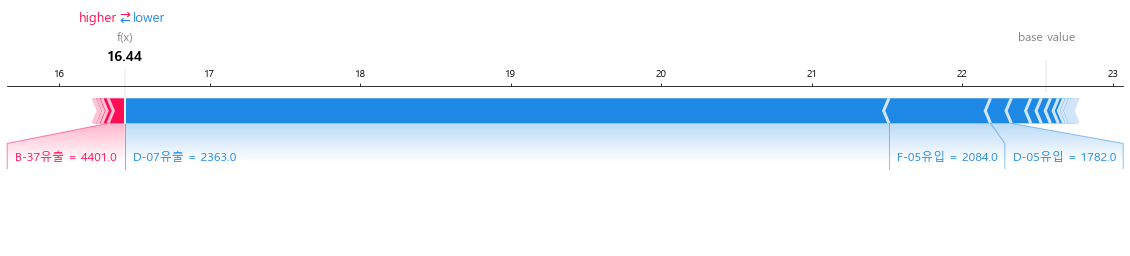

In [9]:
# SHAP 값 계산
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
fig = plt.figure(figsize=(15, 10))
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :], matplotlib=True)
plt.show()

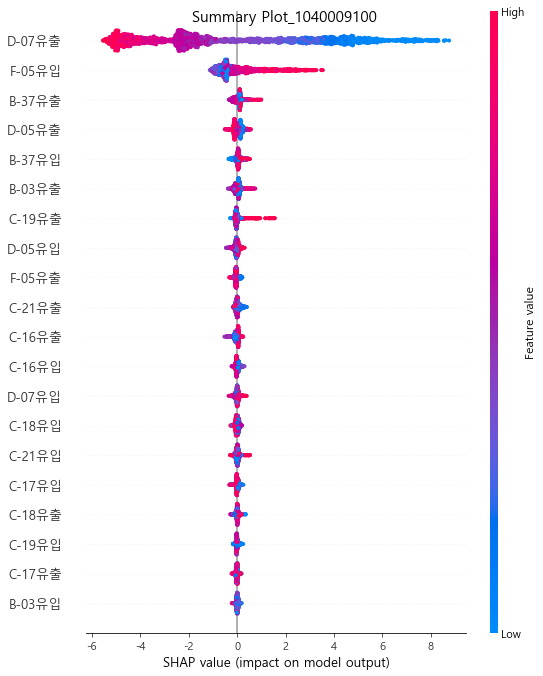

In [10]:
shap.summary_plot(shap_values, X_train, show=False)
plt.suptitle('Summary Plot_1040009100', fontsize=15) # link_id 변경
plt.show;

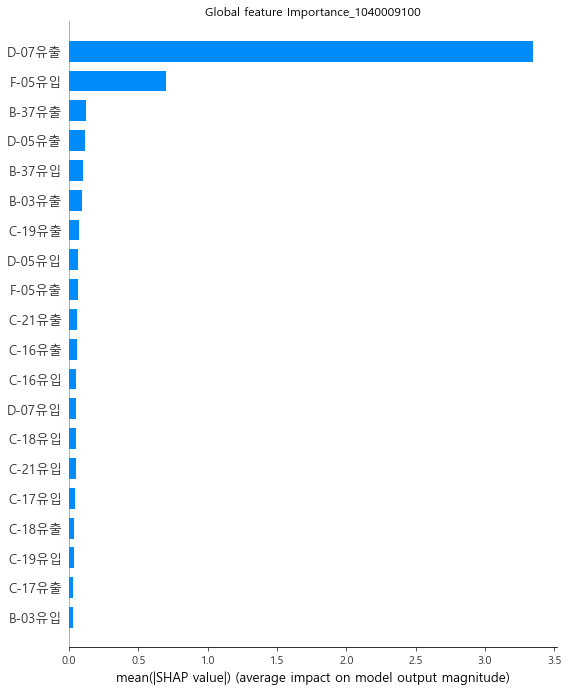

In [11]:
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)
plt.title("Global feature Importance_1040009100")
plt.show;

In [ ]:
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, X_train)